# PIZZA PROJECT - ETU20200267

In [3]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# A-Data Cleaning 

In [44]:
#import dominos pizza xls file 
df = pd.read_excel('Dominos_Pizza_Data.xlsx')
df.head()


,Key,Date,mmdd,DayOfTheWeek,Distance,Timestamp,Tip,OrderAmount,TipPercent,Housing,GenderOfTipper,Cash_Credit_Tip,Web_Site,PersonWhoDelivered,Area,Satisfaction_Rate,Recom_Rate,month
0,712,42233,817,Monday,3.0,0.854167,4.13,12.87,32.090132,Hotel,Male,Cash,0,Sammie,Downtown,0.008093,0.01,Aug
1,339,42212,727,Monday,3.1,0.521528,3.36,15.44,21.761658,Business,Male,Cash,0,Thomas,South,0.008313,0.01,Jul
2,1164,42287,1010,Saturday,3.1,0.762500,0.00,15.71,0.000000,House,Female,Cash,0,Andria,West,0.008337,0.01,Oct
3,1189,42289,1012,Monday,2.5,0.756944,2.00,14.65,13.651877,House,Male,Cash,0,Thomas,South,0.008526,0.01,Oct
4,1085,42288,1011,Sunday,2.5,0.775000,5.22,16.78,31.108463,Apartment,Male,Cash,0,Andria,South,0.008688,0.01,Oct


In [45]:
df.shape

(1301, 18)

In [46]:
#Clean data-frame- Replace with mean or mode: Calculates the column mean by “DayOfTheWeek” and uses it as the replacement value for each missing value

In [47]:
days = df["DayOfTheWeek"].unique()
days


array(['Monday', 'Saturday', 'Sunday', 'Friday', 'Wednesday', 'Thursday',
       'Tuesday'], dtype=object)

In [48]:
# remplacer la valeur des valeurs Nan par la moy de sa colonne 

In [49]:
df.isnull().sum(axis=0)

Key                    0
Date                   0
mmdd                   0
DayOfTheWeek           0
Distance              11
Timestamp              0
Tip                    0
OrderAmount           11
TipPercent             0
Housing                0
GenderOfTipper         0
Cash_Credit_Tip        0
Web_Site               0
PersonWhoDelivered     0
Area                   0
Satisfaction_Rate      7
Recom_Rate            14
month                  0
dtype: int64

In [50]:
cleandata = df.dropna()

In [51]:
print(cleandata)

       Key   Date  mmdd DayOfTheWeek  Distance  Timestamp   Tip  OrderAmount  \
0      712  42233   817       Monday       3.0   0.854167  4.13        12.87   
1      339  42212   727       Monday       3.1   0.521528  3.36        15.44   
2     1164  42287  1010     Saturday       3.1   0.762500  0.00        15.71   
3     1189  42289  1012       Monday       2.5   0.756944  2.00        14.65   
4     1085  42288  1011       Sunday       2.5   0.775000  5.22        16.78   
...    ...    ...   ...          ...       ...        ...   ...          ...   
1289  1097  42273   926     Saturday       0.4   0.772222  3.00        23.13   
1290    23  42197   712       Sunday       1.0   0.730556  6.00        29.90   
1291  1111  42228   812    Wednesday       2.0   0.770139  2.00        42.59   
1292   843  42281  1004       Sunday       1.2   0.822917  7.00        40.61   
1293    70  42252   905     Saturday       0.5   0.720139  7.00        43.00   

      TipPercent    Housing GenderOfTip

In [52]:
df_clean = ["Distance" ,"OrderAmount","Satisfaction_Rate","Recom_Rate"]

In [53]:
df[df_clean] = df[df_clean].fillna(df.mode().iloc[0])
df.isnull().sum(axis=0)

Key                   0
Date                  0
mmdd                  0
DayOfTheWeek          0
Distance              0
Timestamp             0
Tip                   0
OrderAmount           0
TipPercent            0
Housing               0
GenderOfTipper        0
Cash_Credit_Tip       0
Web_Site              0
PersonWhoDelivered    0
Area                  0
Satisfaction_Rate     0
Recom_Rate            0
month                 0
dtype: int64

# B -Data Manipulation

In [54]:
#Find the Maximum " OrderAmount" “PersonWhoDelivered” name

In [55]:
max_ord= df["OrderAmount"].max()
person = df.loc[df["OrderAmount"]== max_ord, : "PersonWhoDelivered"]
Pwd = person [["PersonWhoDelivered", "OrderAmount"]]
Pwd


,PersonWhoDelivered,OrderAmount
900,Angel,97.18


In [56]:
#Print the Total of " OrderAmount" & Total of " Distance" by “PersonWhoDelivered”

In [57]:
result1 = df.groupby('PersonWhoDelivered')[['OrderAmount', 'Distance']].sum()
print(result1)

                    OrderAmount  Distance
PersonWhoDelivered                       
Andria                 6081.573    658.91
Angel                  7267.250    776.86
Sammie                 6733.250    705.95
Thomas                 8304.350    831.72


In [58]:
#Find the average " OrderAmount" by ‘month’ and by “Area”

In [59]:
result2=df.groupby(["month","Area"])["OrderAmount"].mean
print(result2)

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x14ca71150>>


In [60]:
Ord_Month_Area = pd.pivot_table(df,index=['Area',"month"], values =["OrderAmount"], aggfunc=np.mean)
print(Ord_Month_Area)

                OrderAmount
Area     month             
Downtown Aug      21.203729
         Jul      21.011765
         Nov      17.213333
         Oct      20.743000
         Sep      20.810667
East     Aug      21.567064
         Jul      22.898043
         Nov      18.706667
         Oct      21.866324
         Sep      23.745149
North    Aug      20.176063
         Jul      22.028913
         Nov      24.368333
         Oct      22.389130
         Sep      21.573077
South    Aug      22.542307
         Jul      20.039687
         Nov      18.536667
         Oct      22.252963
         Sep      22.396739
West     Aug      22.029123
         Jul      26.974762
         Oct      20.338136
         Sep      21.650870


# C-Data Visualization

In [61]:
#The graph of average of " Distance" of the “DayOfTheWeek”.(X label name = “ DayOfTheWeek” Y label name = average ”Distance.)

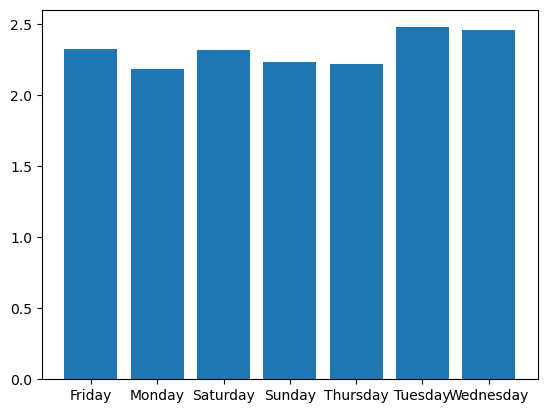

In [62]:
Graph1 = pd.pivot_table(df,index='DayOfTheWeek', values ="Distance", aggfunc=np.mean)
Graph1.reset_index(inplace=True)
plt.bar(Graph1['DayOfTheWeek'], Graph1["Distance"])
plt.show()


In [63]:
#The graph of total " OrderAmount" of the ‘month'.(X label name = ‘month’ , Y label name = total " OrderAmount" .)

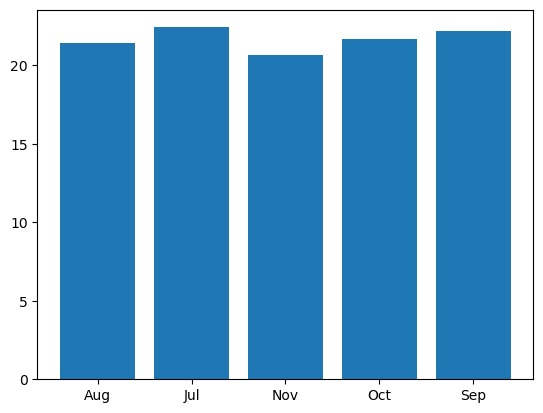

In [64]:
# Graph2 = pd.pivot_table(df,index= 'month', values = "OrderAmount", aggfunc=np.mean)
Graph2.reset_index(inplace=True)
Graph2
plt.bar(Graph2['month'], Graph2['OrderAmount'])
plt.show()


# D- Programming Algorithm Challenges

In [65]:
#The manager data scientist of (Domino’s Pizza) asks you to publish the Performance Score “Perf_Score” list by “PersonWhoDelivered” of the month of August “Aug”

In [66]:
for i in (['Samie','Thomas','Andria','Angel']):
    print ("Name = ", i)
    
    
    dfpwd=df.loc[df["PersonWhoDelivered"] == i]
    df_Aug = dfpwd.loc[(dfpwd['month'] == "Aug")]
    satisfaction = df_Aug.Satisfaction_Rate.mean()
    recom =df_Aug.Recom_Rate.mean()
    perf_score = satisfaction / (1-recom)
    
    print("Performance score : " ,perf_score)

Name =  Samie
Performance score :  nan
Name =  Thomas
Performance score :  0.7138120361719144
Name =  Andria
Performance score :  0.7202207406647174
Name =  Angel
Performance score :  0.6614252651421945
